In [1]:
pip install numpy scikit-learn gensim

In [2]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from gensim.models.keyedvectors import KeyedVectors
from datasets import load_dataset
from torchtext.vocab import GloVe



In [4]:
import gensim.downloader as api

# Load the GloVe model (100-dimensional vectors)
glove_vectors = api.load('glove-wiki-gigaword-100')

# Load the dataset from Hugging Face
from datasets import load_dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")
train_data = dataset["train"]
test_data = dataset["test"]

import numpy as np

def document_vector(doc):
    """Create document vectors by averaging word vectors, ignoring words not in the model."""
    words = [word for word in doc if word in glove_vectors.key_to_index]
    if not words:  # Handle case where no words are in the GloVe vocabulary
        return np.zeros(glove_vectors.vector_size)
    word_vectors = [glove_vectors[word] for word in words]
    return np.mean(word_vectors, axis=0)

def preprocess_dataset(data):
    return np.array([document_vector(doc['tokens']) for doc in data])

# Preprocess the train and test data
X_train = preprocess_dataset(train_data)
X_test = preprocess_dataset(test_data)

# Assuming labels are available and appropriate for your task, extract them as well
y_train = [example['ner_tags'][0] for example in train_data]  # Simplification: assuming one label per example
y_test = [example['ner_tags'][0] for example in test_data]

# Train and evaluate the classifier
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Further evaluation and visualization code remains the same


[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


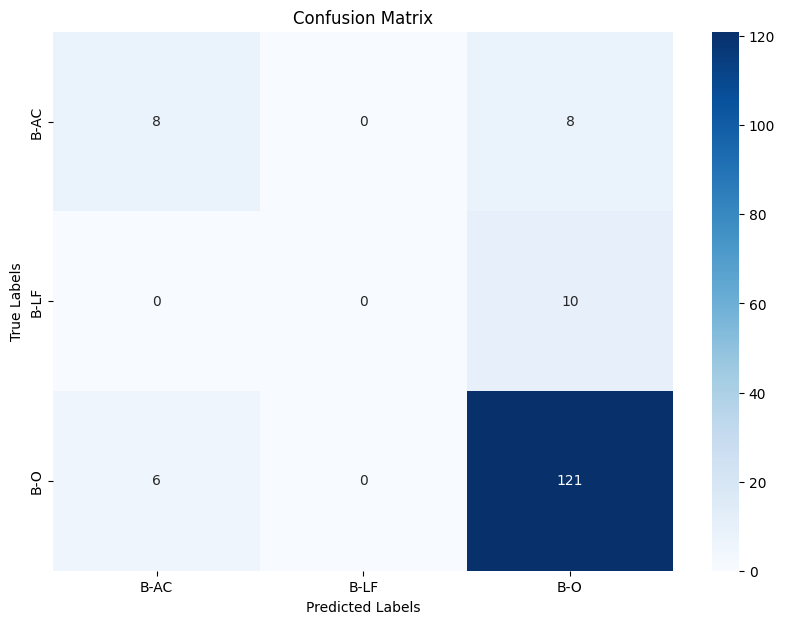

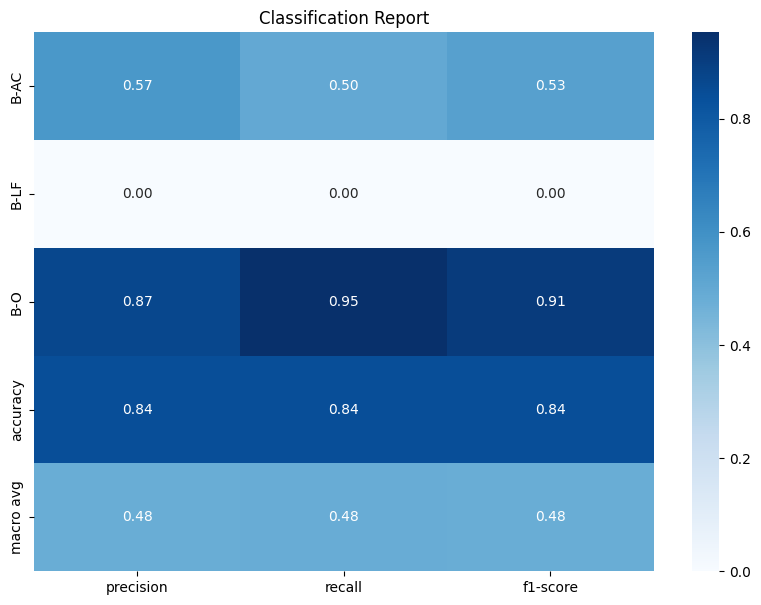

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming y_test and y_pred are available from the previous classification code
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize the classification report
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")  # Exclude the last row & column for average/total
plt.title('Classification Report')
plt.show()


## fasttext with SVM

In [5]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227136 sha256=ef9f67d091a8995f02cdaced5f9c26fde47039cb4091d49b07487b9cd2a11fd4
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [6]:
from datasets import load_dataset
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import fasttext
import fasttext.util
import numpy as np

In [7]:
dataset = load_dataset("surrey-nlp/PLOD-CW")
train_data = dataset["train"]
test_data = dataset["test"]

In [1]:
# Load a pre-trained FastText model
#fasttext.util.download_model('en', if_exists='ignore')
#ft_model = fasttext.load_model('cc.en.300.bin')
import fasttext

# Load the pre-trained FastText model directly from the URL
ft_model = fasttext.load_model('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin')


ValueError: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin cannot be opened for loading!

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Function to get embeddings
def text_to_embedding(sentence):
    inputs = tokenizer(' '.join(sentence), return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    # You can use various strategies like taking the mean of all token embeddings
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings


In [ ]:
def prepare_data(data):
    X = []
    y = []
    for example in data:
        sentence = example['tokens']
        ner_tags = example['ner_tags']
        # Classify if sentence contains 'LF' tag
        label = int(any(tag == 'B-LF' or tag == 'I-LF' for tag in ner_tags))
        X.append(text_to_embedding(sentence))
        y.append(label)
    return np.array(X), np.array(y)


In [ ]:
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)



In [ ]:
# Train an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
predictions = svm_classifier.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-LF', 'LF'], yticklabels=['Non-LF', 'LF'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()